In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import statsmodels.api as s
from statsmodels.formula.api import ols
from scipy import stats
from datetime import date
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor,export_graphviz


In [2]:
os.chdir("D:\Temp")
anz = pd.read_excel('ANZ.xlsx')
anz.isnull().sum()
anz.drop("bpay_biller_code", axis=1, inplace = True)
anz.drop("merchant_code", axis=1, inplace = True)
anz["month"] = anz["date"].dt.month_name()
anz.describe()
anz.info()
anz.columns
anz["Age_Category"] = ""
for i in range(0,len(anz),1):
    if anz["age"][i] <= 22:
        anz["Age_Category"][i] = "(<22)"
    elif anz["age"][i] <= 28:
        anz["Age_Category"][i] = "(22-28)"
    elif anz["age"][i] <= 38:
        anz["Age_Category"][i] = "(28-38)"
    else:
        anz["Age_Category"][i] = "(>38)" 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   first_name         12043 non-null  object        
 8   balance            12043 non-null  float64       
 9   date               12043 non-null  datetime64[ns]
 10  gender             12043 non-null  object        
 11  age                12043 non-null  int64         
 12  merchant_suburb    7717 non-null   object        
 13  merchant_state     7717 non-null   object        
 14  extrac

<ipython-input-2-3890d4cbddac>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anz["Age_Category"][i] = "(22-28)"
<ipython-input-2-3890d4cbddac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anz["Age_Category"][i] = "(28-38)"
<ipython-input-2-3890d4cbddac>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anz["Age_Category"][i] = "(>38)"
<ipython-input-2-3890d4cbddac>:13: SettingWithCopyWarning: 
A value is trying to be set on a 

In [3]:
df_sal_trans = anz.loc[(anz['txn_description'] == "PAY/SALARY")]
df_sal_trans.drop(['card_present_flag','merchant_id','merchant_suburb', 'merchant_state','merchant_long_lat'], axis = 1, inplace  = True)
df_sal_sum = pd.DataFrame(df_sal_trans.pivot_table(index = 'customer_id',values = ["amount"], aggfunc = "sum"))
df_sal_counts = pd.DataFrame(df_sal_trans.pivot_table(index = 'customer_id', values = ["amount"], aggfunc = "count"))
df_sal_sum.reset_index(inplace = True)
df_sal_counts.reset_index(inplace = True)
df_sal = df_sal_sum.merge(df_sal_counts, on = 'customer_id')
df_sal.columns
df_sal.rename(columns = {'amount_x':'salary','amount_y':'sal_frequency' }, inplace = True)
df_sal['Annual_Salary'] = df_sal['salary'] * 4
df_sal.columns
df_sal.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,customer_id,salary,sal_frequency,Annual_Salary
0,CUS-1005756958,12616.11,13,50464.44
1,CUS-1117979751,25050.55,7,100202.20
2,CUS-1140341822,11499.06,6,45996.24
3,CUS-1147642491,22248.07,13,88992.28
4,CUS-1196156254,27326.11,7,109304.44


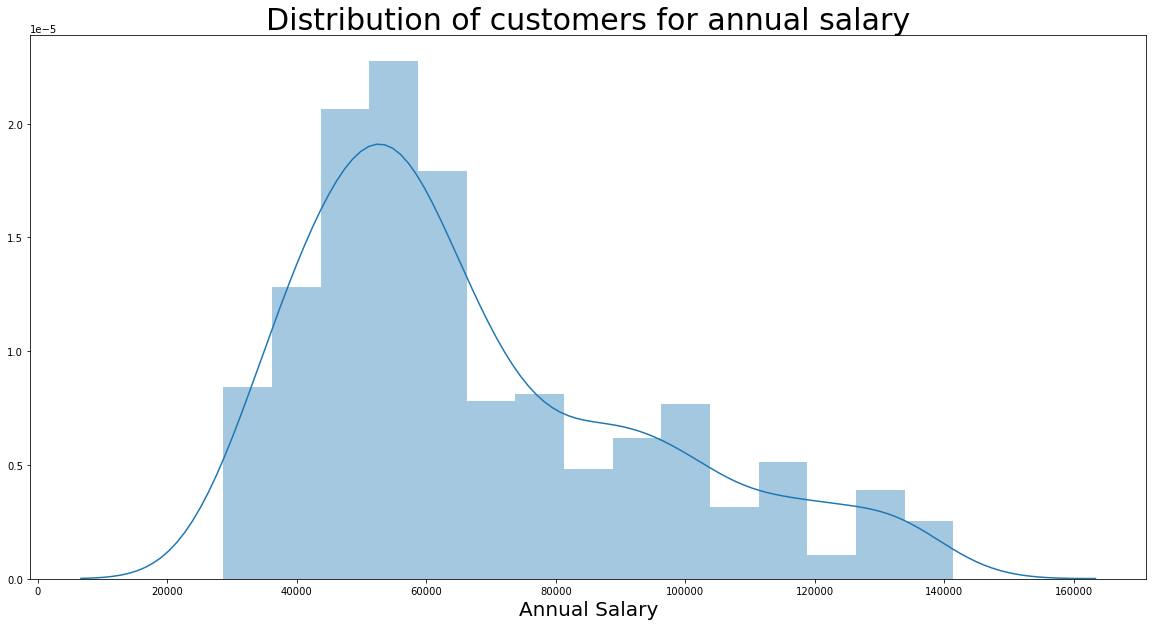

In [15]:
plt.figure(figsize = (20, 10))
sns.distplot(df_sal_trans['Annual_Salary'])
plt.title("Distribution of customers for annual salary",fontsize = 30)
plt.xlabel('Annual Salary',fontsize = 20)  
plt.show()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,month,Age_Category,sal_frequency,Annual_Salary
0,posted,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,Isaiah,8342.11,2018-08-01,M,23,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,credit,August,(22-28),28,109310.6
1,posted,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,Isaiah,10724.87,2018-08-15,M,23,2018-08-15T11:00:00.000+0000,3903.95,a0ba656db7c5441dbb782f4bbc6755ac,Australia,CUS-1462656821,credit,August,(22-28),28,109310.6
2,posted,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,Isaiah,13030.74,2018-08-29,M,23,2018-08-29T11:00:00.000+0000,3903.95,0d496e23bf2d461eb3ac886c1a16f3b4,Australia,CUS-1462656821,credit,August,(22-28),28,109310.6
3,posted,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,Isaiah,15523.69,2018-09-12,M,23,2018-09-12T11:00:00.000+0000,3903.95,4e8da0f42d534b919b2b5c045204d8cf,Australia,CUS-1462656821,credit,September,(22-28),28,109310.6
4,posted,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,Isaiah,17906.31,2018-09-26,M,23,2018-09-26T11:00:00.000+0000,3903.95,3885424223de46eb894231ee607c28f2,Australia,CUS-1462656821,credit,September,(22-28),28,109310.6


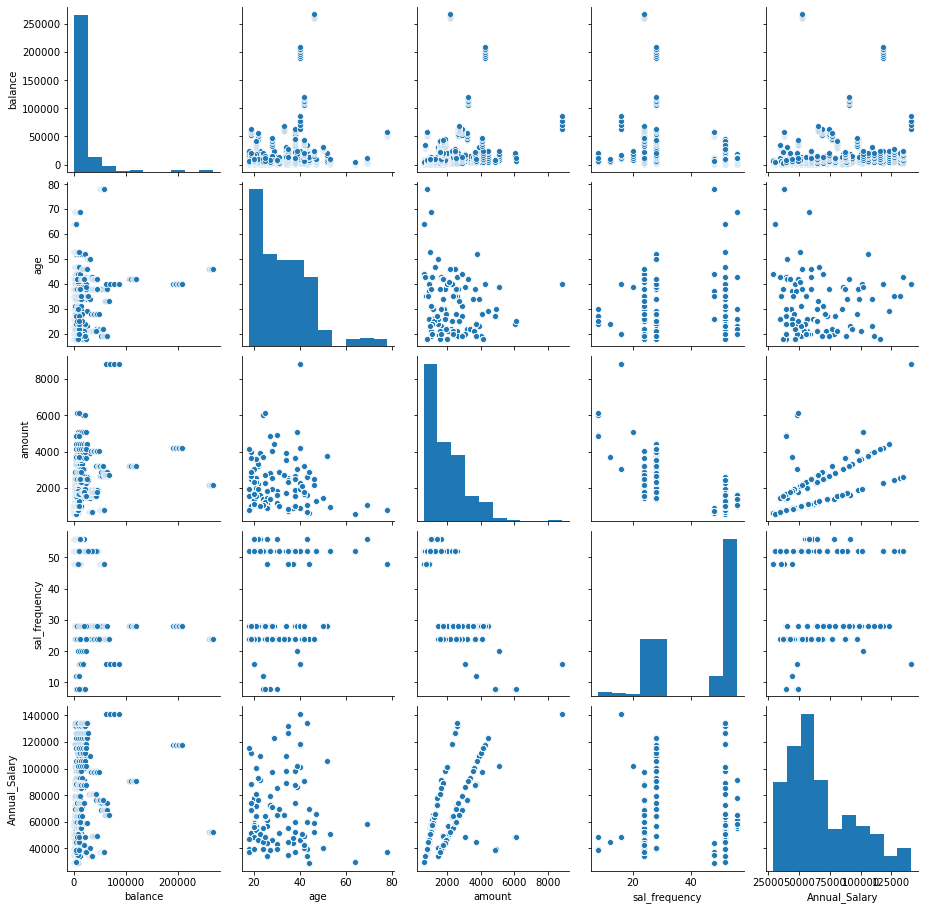

In [5]:
df_sal_trans=df_sal_trans.merge(df_sal, on = "customer_id")
df_sal_trans['sal_frequency'] = df_sal_trans['sal_frequency'] * 4
df_sal_trans.drop(['salary'], axis = 1, inplace = True)
df_sal_date = pd.DataFrame(df_sal_trans.pivot_table(index = 'customer_id',columns = 'month', values = ["amount"], aggfunc = "count", margins = True))
sns.pairplot(df_sal_trans, kind = "scatter")
df_sal_trans.corr()
df_sal_trans.columns
df_sal_trans.head()

In [6]:
df_sal_1 = pd.DataFrame(df_sal_trans.pivot_table(index = 'customer_id', values = ['status', 'account', 'currency', 'long_lat', 'first_name', 'gender', 'age', 'country', 'movement', 'Age_Category', 'sal_frequency', 'Annual_Salary'], aggfunc = 'max'))
df_sal_2 = pd.DataFrame(df_sal_trans.pivot_table(index = 'customer_id', values ='balance', aggfunc = 'mean'))
df_sal_1.reset_index(inplace = True)
df_sal_2.reset_index(inplace = True)
df_sal = df_sal_1.merge(df_sal_2, on = 'customer_id')
df_sal.columns

df_trans = pd.DataFrame(anz.pivot_table(index = "customer_id", values = "transaction_id", aggfunc = "count"))
df_trans.rename(columns = {'transaction_id':'trans_frequency'}, inplace = True)
df_trans.reset_index(inplace = True)
df_sal = df_sal.merge(df_trans, on = "customer_id")

df_des_freq = pd.DataFrame(anz.pivot_table(index = "customer_id", columns = "txn_description", values = "transaction_id",aggfunc = "count"))
df_des_freq.reset_index(inplace = True)
df_sal = df_sal.merge(df_des_freq, on = "customer_id")
df_sal.rename(columns = {'INTER BANK':'INTER_BANK_freq','PAY/SALARY':'PAY_SALARY_freq', 'PAYMENT':'PAYMENT_freq', 'POS':'POS_freq', 'PHONE BANK':'PHONE_BANK_freq', 'SALES-POS':'SALES_POS_freq'}, inplace = True) 
df_sal.fillna(0, inplace = True)

df_des_sum = pd.DataFrame(anz.pivot_table(index = "customer_id", columns = "txn_description", values = "amount",aggfunc = "sum", margins = True, margins_name = "total_amount"))
df_des_sum.reset_index(inplace = True)
df_sal = df_sal.merge(df_des_sum, on = "customer_id")
df_sal.rename(columns = {'INTER BANK':'INTER_BANK_amount','PAY/SALARY':'PAY_SALARY_amount', 'PAYMENT':'PAYMENT_amount', 'POS':'POS_amount', 'PHONE BANK':'PHONE_BANK_amount', 'SALES-POS':'SALES_POS_amount'}, inplace = True) 

df_mov = pd.DataFrame(anz.pivot_table(index = "customer_id", columns = "movement", values = "transaction_id",aggfunc = "count"))
df_mov.reset_index(inplace = True)
df_sal = df_sal.merge(df_mov, on = "customer_id")
df_sal.fillna(0, inplace = True)

df_card = pd.DataFrame(anz.pivot_table(index = "customer_id", columns = 'card_present_flag', values = "transaction_id",aggfunc = "count"))
df_card.rename(columns = {1.0:'card_used', 0.0:'card_not_used'}, inplace = True)
df_card.reset_index(inplace = True)
df_sal = df_sal.merge(df_card, on = "customer_id")

print(df_sal.columns)
df_sal.head()

Index(['customer_id', 'Age_Category', 'Annual_Salary', 'account', 'age',
       'country', 'currency', 'first_name', 'gender', 'long_lat', 'movement',
       'sal_frequency', 'status', 'balance', 'trans_frequency',
       'INTER_BANK_freq', 'PAY_SALARY_freq', 'PAYMENT_freq', 'PHONE_BANK_freq',
       'POS_freq', 'SALES_POS_freq', 'INTER_BANK_amount', 'PAY_SALARY_amount',
       'PAYMENT_amount', 'PHONE_BANK_amount', 'POS_amount', 'SALES_POS_amount',
       'total_amount', 'credit', 'debit', 'card_not_used', 'card_used'],
      dtype='object')


,customer_id,Age_Category,Annual_Salary,account,age,country,currency,first_name,gender,long_lat,...,PAY_SALARY_amount,PAYMENT_amount,PHONE_BANK_amount,POS_amount,SALES_POS_amount,total_amount,credit,debit,card_not_used,card_used
0,CUS-1005756958,(>38),50464.44,ACC-2828321672,53,Australia,AUD,Stephanie,F,153.03 -27.51,...,12616.11,1296.0,546.0,748.01,1062.85,16268.97,13,60,9.0,39.0
1,CUS-1117979751,(<22),100202.20,ACC-4065652575,21,Australia,AUD,Lucas,M,115.81 -31.82,...,25050.55,3957.0,0.0,606.37,3369.45,33984.37,7,93,9.0,43.0
2,CUS-1140341822,(22-28),45996.24,ACC-80388494,28,Australia,AUD,Dustin,M,144.97 -37.42,...,11499.06,852.0,0.0,1356.47,3033.07,17010.60,6,74,12.0,53.0
3,CUS-1147642491,(28-38),88992.28,ACC-3233697971,34,Australia,AUD,Robin,F,151.04 -33.77,...,22248.07,2597.0,0.0,2062.31,1823.44,28980.82,13,105,19.0,57.0
4,CUS-1196156254,(28-38),109304.44,ACC-3485804958,34,Australia,AUD,Jessica,F,138.52 -35.01,...,27326.11,3017.0,0.0,2305.65,2634.96,36050.72,7,238,35.0,128.0


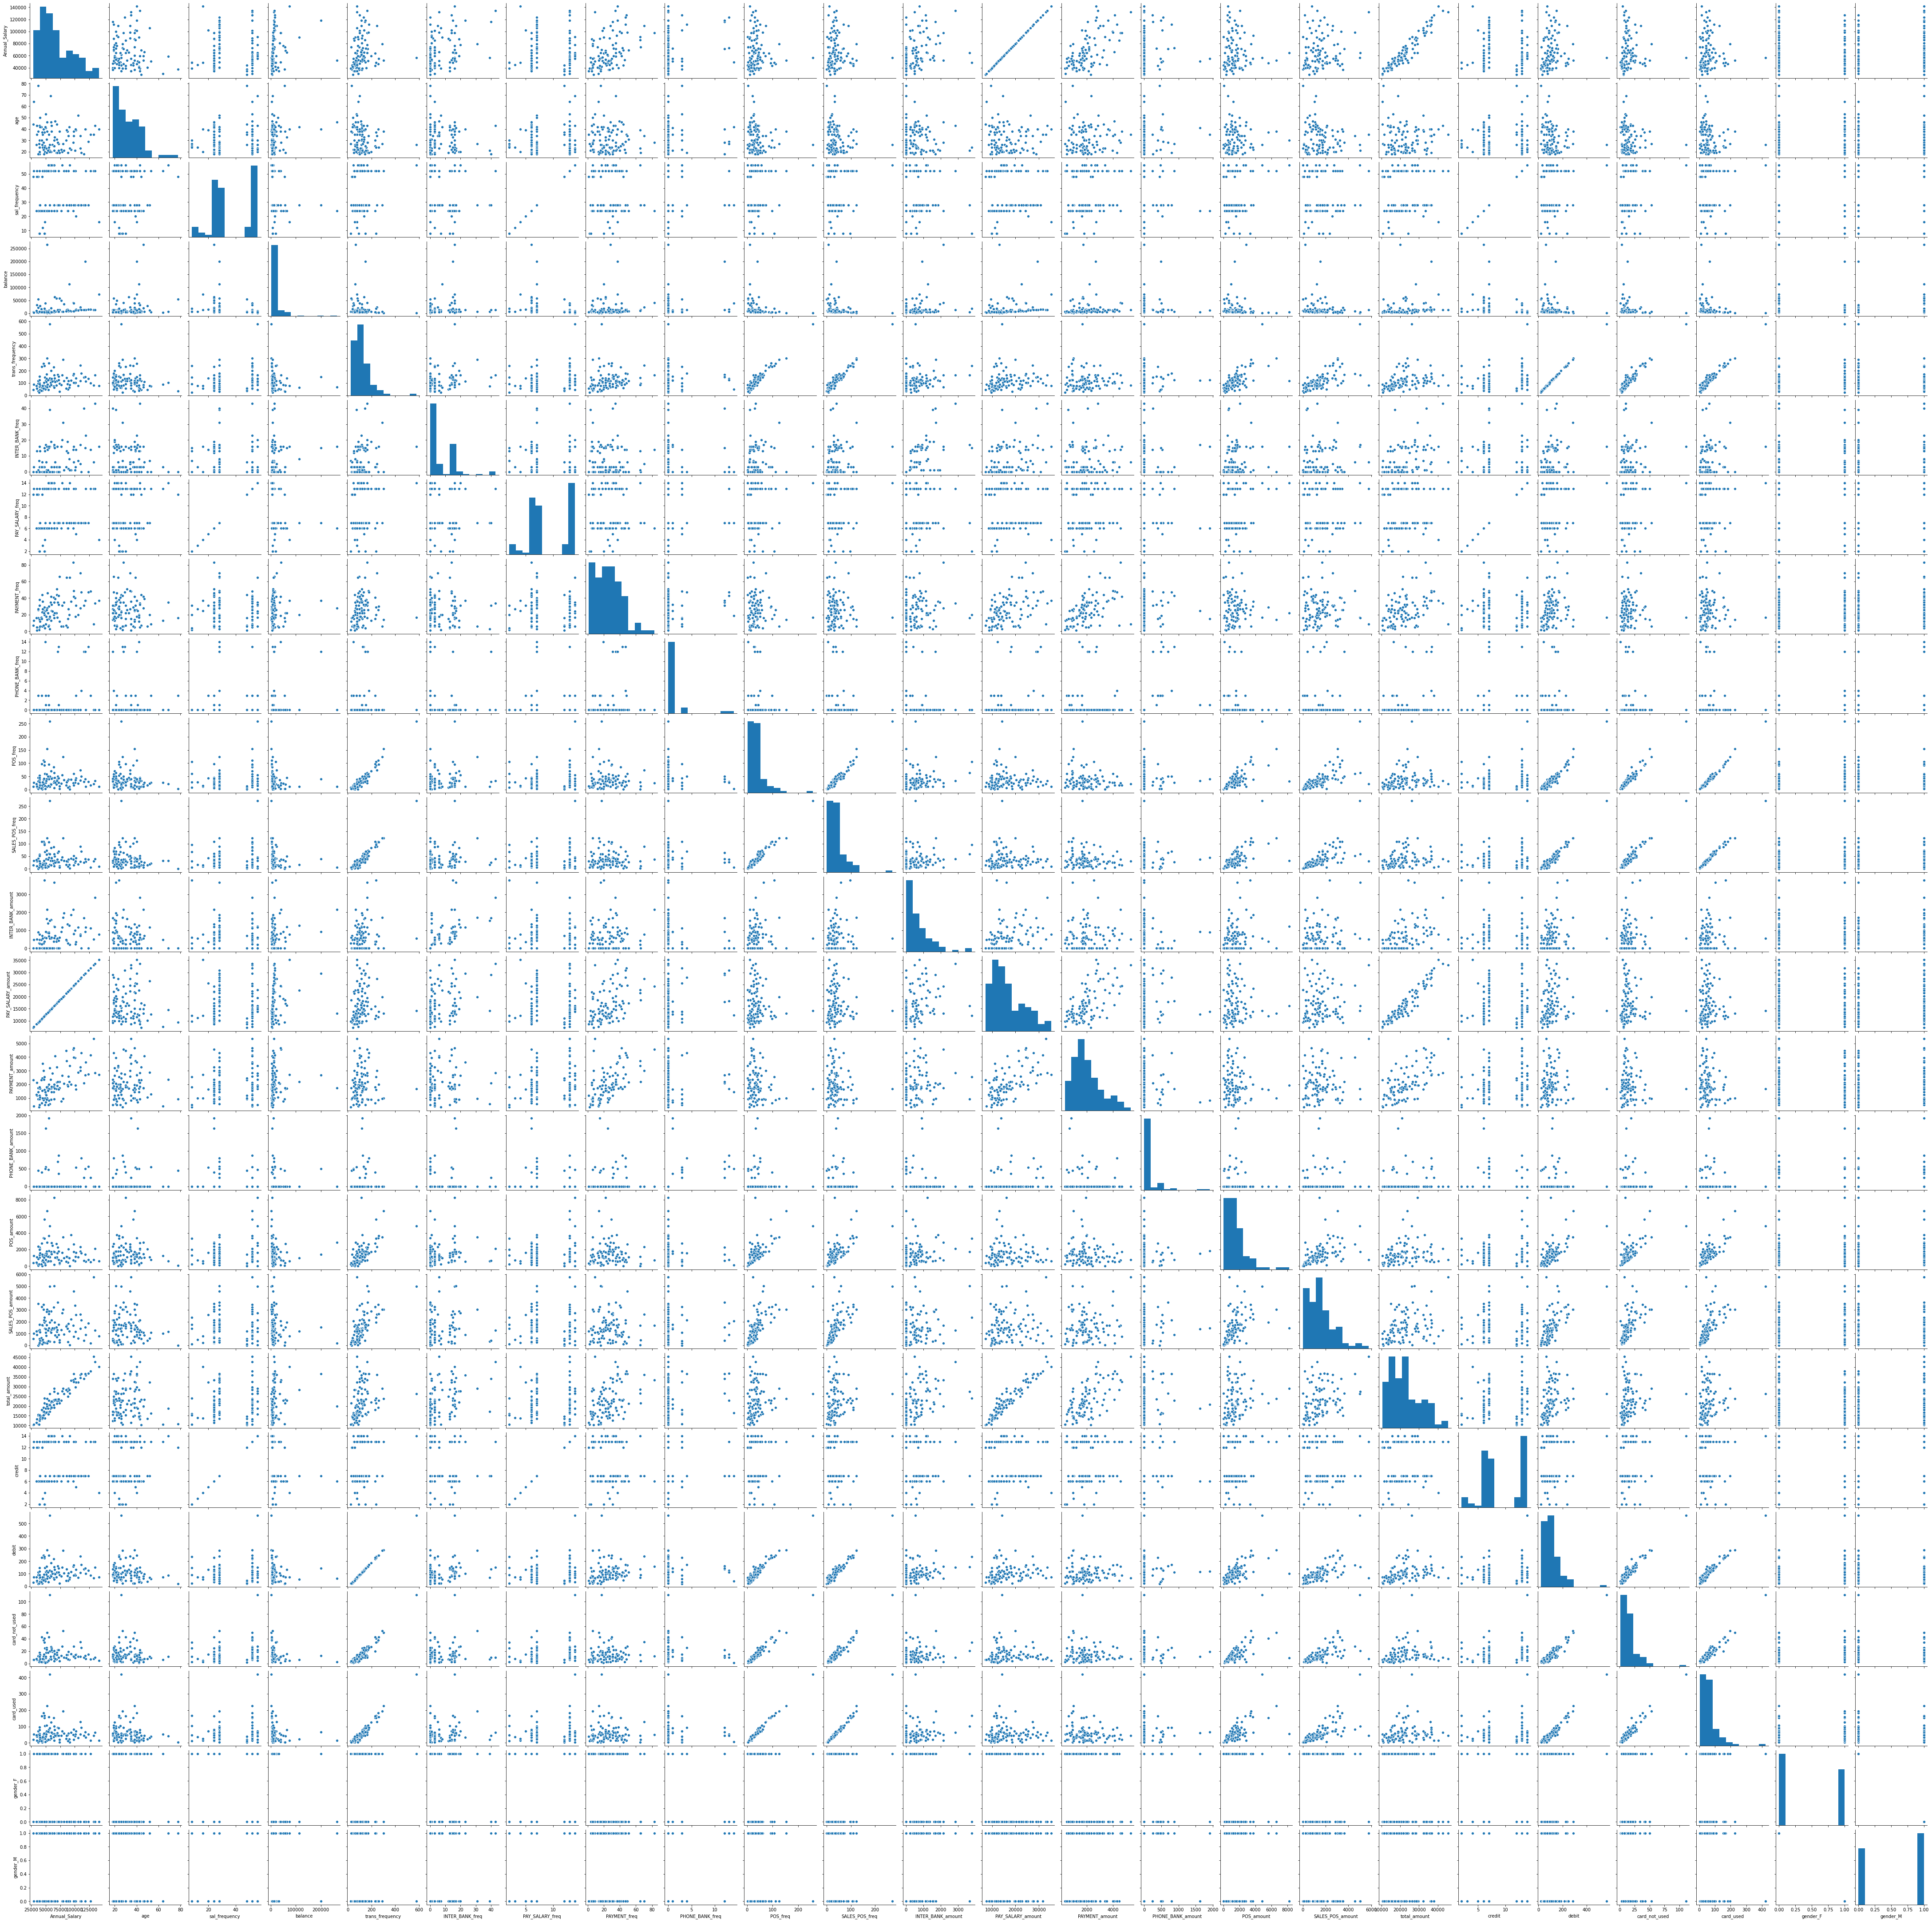

                   Annual_Salary       age  sal_frequency   balance  \
Annual_Salary           1.000000 -0.036504       0.033301  0.198755   
age                    -0.036504  1.000000       0.182368  0.227026   
sal_frequency           0.033301  0.182368       1.000000 -0.177350   
balance                 0.198755  0.227026      -0.177350  1.000000   
trans_frequency         0.099279 -0.168069       0.176316 -0.136196   
INTER_BANK_freq         0.376498 -0.054395      -0.082167  0.150899   
PAY_SALARY_freq         0.033301  0.182368       1.000000 -0.177350   
PAYMENT_freq            0.439966 -0.070249      -0.001522  0.071299   
PHONE_BANK_freq         0.242455  0.023672      -0.041208  0.189122   
POS_freq               -0.063520 -0.157512       0.142596 -0.174774   
SALES_POS_freq         -0.052648 -0.165381       0.146722 -0.177249   
INTER_BANK_amount       0.290338 -0.099233      -0.082618  0.232321   
PAY_SALARY_amount       1.000000 -0.036504       0.033301  0.198755   
PAYMEN

In [7]:
df_sal = pd.get_dummies(df_sal, columns = ["gender"])
cor=df_sal.corr()
sns.pairplot(df_sal, kind = "scatter")
plt.show()
print(cor)

In [8]:
#Predictive Analysis
df_sal.fillna(0, inplace = True)
x = df_sal.drop(columns = ['customer_id', 'Age_Category', 'Annual_Salary', 'account','country', 'currency', 'first_name', 'long_lat', 'movement', 'status'])
y = df_sal['Annual_Salary']
#y = np.log(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
print("\n\n Shapes Of Training And Test Data:\n",x_train.shape, x_test.shape, y_train.shape, y_test.shape)
base_pred = np.mean(y_test)
print("Base Prediction:\t",base_pred)
base_pred = np.repeat(base_pred, len(y_test))
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print("RMSE:\t",base_root_mean_square_error)



 Shapes Of Training And Test Data:
 (80, 23) (20, 23) (80,) (20,)
Base Prediction:	 57448.362
RMSE:	 19986.35098954274


In [9]:
#OLS Model

lm = ols('Annual_Salary ~ age + sal_frequency + balance + \
         trans_frequency + total_amount + credit + debit + \
        card_used + card_not_used + INTER_BANK_freq + PAYMENT_freq + \
        PHONE_BANK_freq + POS_freq + SALES_POS_freq + \
        INTER_BANK_amount + PAYMENT_amount + PHONE_BANK_amount + POS_amount +\
        SALES_POS_amount + gender_F + gender_M', data = df_sal).fit()
print("OLS model:\n",lm.summary())



OLS model:
                             OLS Regression Results                            
Dep. Variable:          Annual_Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.963e+29
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        21:29:19   Log-Likelihood:                 2174.9
No. Observations:                 100   AIC:                            -4316.
Df Residuals:                      83   BIC:                            -4272.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.092e-

In [10]:
#Modified OLS Model

lm_modified = ols('Annual_Salary ~ balance + total_amount + INTER_BANK_amount + PAYMENT_amount + PHONE_BANK_amount + POS_amount + SALES_POS_amount ', data = df_sal).fit()
print("\n Modified OLS model:\n",lm_modified.summary())


 Modified OLS model:
                             OLS Regression Results                            
Dep. Variable:          Annual_Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.107e+30
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        21:29:19   Log-Likelihood:                 2220.1
No. Observations:                 100   AIC:                            -4424.
Df Residuals:                      92   BIC:                            -4403.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept      



 RMSE Of Linear Regression Model:	 1.7109526880076674e-10
R Squared Value For Test And Train Data Are: 	 1.0 1.0


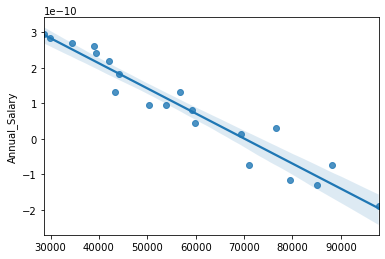

In [11]:
#Linear Regression

lnr = LinearRegression(fit_intercept=True)
lnr_model = lnr.fit(x_train, y_train)
bi = lnr_model.coef_
b0 = lnr_model.intercept_
salary_predictions_lnr_model = lnr.predict(x_test)

lnr_model_mse = mean_squared_error(y_test, salary_predictions_lnr_model)
lnr_model_rmse = np.sqrt(lnr_model_mse)
print("\n\n RMSE Of Linear Regression Model:\t",lnr_model_rmse)

r2_lnr_test = lnr_model.score(x_test, y_test)
r2_lnr_train = lnr_model.score(x_train, y_train)
print("R Squared Value For Test And Train Data Are: \t",r2_lnr_test, r2_lnr_train)

lnr_residuals=y_test-salary_predictions_lnr_model
sns.regplot(salary_predictions_lnr_model, lnr_residuals, scatter=True, fit_reg=True)
plt.show()

In [12]:
#Decision Tree

tree = DecisionTreeRegressor()
tree_model = tree.fit(x_train, y_train)
salary_predictions_tree_model = tree.predict(x_test)

tree_model_mse = mean_squared_error(y_test, salary_predictions_tree_model)
tree_model_rmse = np.sqrt(tree_model_mse)
print("\n RMSE Of Decision Tree Regression Model:\t",tree_model_rmse)


 RMSE Of Decision Tree Regression Model:	 2808.878944077152


In [13]:
#Conclusion

print("\n RESULT: \n RMSE Of Linear Regression Model:\t",lnr_model_rmse, "\n RMSE Of Decision Tree Regression Model:\t",tree_model_rmse)


 RESULT: 
 RMSE Of Linear Regression Model:	 1.7109526880076674e-10 
 RMSE Of Decision Tree Regression Model:	 2808.878944077152


In [14]:
"Thank You."

'Thank You.'